In [1]:
def compare_data(DPrior, dObs, DPosterior, CeDiag, time_range):
    # Ensure the data is in numpy arrays
    DPrior = np.array(DPrior)
    dObs = np.array(dObs)
    DPosterior = np.array(DPosterior)
    CeDiag = np.array(CeDiag)

    # Reshape the data
    dObs_reshaped = dObs.reshape((4, 61))
    DPrior_reshaped = DPrior.reshape((4, 61, 100))
    DPosterior_reshaped = DPosterior.reshape((4, 61, 100))
    CeDiag_reshaped = CeDiag.reshape((4, 61))

    # Create a figure with 4 subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 20))

    # For each subplot
    for i, ax in enumerate(axes):
        # Plot the observed data with error bars
        ax.errorbar(time_range, dObs_reshaped[i], yerr=CeDiag_reshaped[i], fmt='o', color='r', label='Observed Data')

        # Plot the DPrior data
        for j in range(100):
            ax.plot(time_range, DPrior_reshaped[i, :, j], 'b', alpha=0.1, label='DPrior' if j==0 else "")
        
        # Plot the DPosterior data
        for j in range(100):
            ax.plot(time_range, DPosterior_reshaped[i, :, j], 'g', alpha=0.1, label='DPosterior' if j==0 else "")

        ax.set_title(f'Observation Data vs DPrior vs DPosterior for Monitoring Point {i+1}')
        ax.legend()

    plt.tight_layout()
    plt.show()


In [2]:
 # %%
import os
import numpy as np
import math
import os
import re
import shutil
import time 
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import glob
import xarray as xr



# %% [markdown]
 #read reference metadata from reference_folder
reference_folder = '/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/REFERENCE'
with open(os.path.join(reference_folder,'Reference_metadata.pkl'), 'rb') as f:
    metadata = pickle.load(f)

reference_model = xr.open_dataset(os.path.join(reference_folder,'ReferenceSimulation.nc'))

dt = metadata.iloc[0].values[0]
nsteps = metadata.iloc[1].values[0]
well_coords = metadata.iloc[2].values[0]
well_rates = metadata.iloc[3].values[0]
initial_gas_rate = metadata.iloc[4].values[0]
# output_folder = metadata.iloc[5].values[0]
# output_filename = metadata.iloc[6].values[0]
treatGeoModel = metadata.iloc[7].values[0]
RefGeoData_path = metadata.iloc[8].values[0]

time_range = reference_model.time.values
NTimesteps=len(time_range)


In [3]:
reference_folder = '/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/REFERENCE'
with open(os.path.join(reference_folder,'Reference_metadata.pkl'), 'rb') as f:
    metadata = pickle.load(f)

reference_model = xr.open_dataset(os.path.join(reference_folder,'ReferenceSimulation.nc'))

dt = metadata.iloc[0].values[0]
nsteps = metadata.iloc[1].values[0]
well_coords = metadata.iloc[2].values[0]
well_rates = metadata.iloc[3].values[0]
initial_gas_rate = metadata.iloc[4].values[0]
# output_folder = metadata.iloc[5].values[0]
# output_filename = metadata.iloc[6].values[0]
treatGeoModel = metadata.iloc[7].values[0]
RefGeoData_path = metadata.iloc[8].values[0]
#%%
#----DEFINE OBSERVATION DATA----#
#define grid locations of the monitoring points on the 32x32 grid (for all time steps)
monitoring_numbers = 4
monitoring_positions = [[2,2], [18,2] ,[2,18], [18,18]] #wells position in the 20x20 grid

obsData = []
for (i,j) in monitoring_positions:
    obsData.append(reference_model['Pressure'].isel(X=i).isel(Y=j).values)
obsValues=np.array(obsData)
dObs = obsValues.flatten()

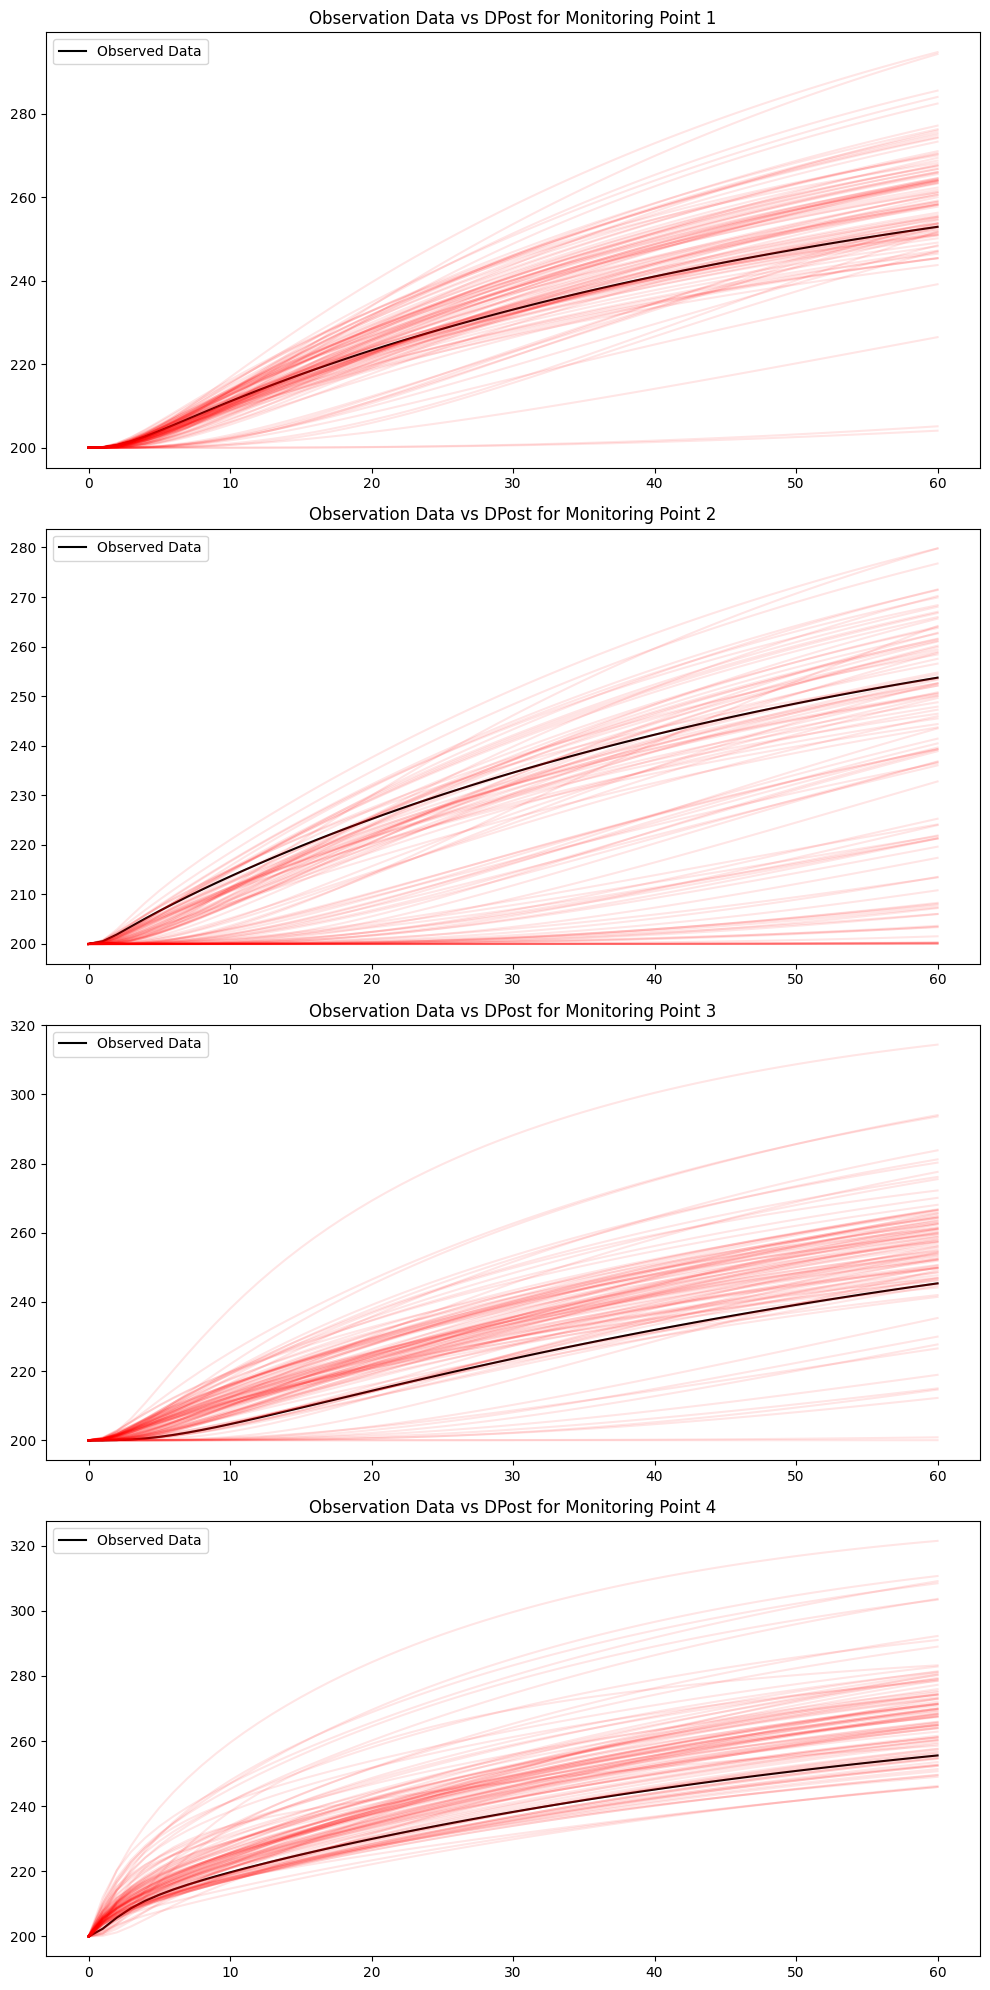

In [37]:
# Reshape the data
dObs_reshaped = dObs.reshape((4, 61))
DPost_reshaped = DPost.values.reshape((4, 61, 100))

# Create a figure with 4 subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

# For each subplot
for i, ax in enumerate(axes):
    # Plot the observed data
    ax.plot(dObs_reshaped[i], 'k', label='Observed Data')
    
    # Plot the DPost data
    for j in range(100):
        ax.plot(DPost_reshaped[i, :, j], 'r', alpha=0.1)

    ax.set_title(f'Observation Data vs DPost for Monitoring Point {i+1}')
    ax.legend()

plt.tight_layout()
plt.show()


In [40]:
def compare_data(DPrior, dObs, DPosterior):
    # Ensure the data is in numpy arrays
    DPrior = np.array(DPrior)
    dObs = np.array(dObs)
    DPosterior = np.array(DPosterior)

    # Reshape the data
    dObs_reshaped = dObs.reshape((4, 61))
    DPrior_reshaped = DPrior.reshape((4, 61, 50))
    DPosterior_reshaped = DPosterior.reshape((4, 61, 50))

    # Create a figure with 4 subplots
    fig, axes = plt.subplots(4, 1, figsize=(6, 16))

    # For each subplot
    for i, ax in enumerate(axes):
        # Plot the observed data
        ax.plot(dObs_reshaped[i], 'k', label='Observed Data')

        # Plot the DPrior data
        for j in range(100):
            ax.plot(DPrior_reshaped[i, :, j], 'gray', alpha=0.1, label='DPrior' if j==0 else "")
        
        # Plot the DPosterior data
        for j in range(100):
            ax.plot(DPosterior_reshaped[i, :, j], 'b', alpha=0.1, label='DPosterior' if j==0 else "")

        ax.set_title(f'Observation Data vs DPrior vs DPosterior for Monitoring Point {i+1}')
        ax.legend()

    plt.tight_layout()
    plt.show()



In [81]:
def compare_data(DPrior, dObs, DPosterior, CeDiag, time_range):
    # Ensure the data is in numpy arrays
    DPrior = np.array(DPrior)
    dObs = np.array(dObs)
    DPosterior = np.array(DPosterior)
    CeDiag = np.array(CeDiag)

    # Reshape the data
    dObs_reshaped = dObs.reshape((4, 61))
    DPrior_reshaped = DPrior.reshape((4, 61, 100))
    DPosterior_reshaped = DPosterior.reshape((4, 61, 100))
    CeDiag_reshaped = CeDiag.reshape((4, 61))

    # Create a figure with 4 subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 20))

    # For each subplot
    for i, ax in enumerate(axes):
        # Plot the observed data with error bars
        ax.errorbar(time_range, dObs_reshaped[i], yerr=CeDiag_reshaped[i], fmt='o', color='r', label='Observed Data')

        # Plot the DPrior data
        for j in range(100):
            ax.plot(time_range, DPrior_reshaped[i, :, j], 'gray', alpha=0.2, label='DPrior' if j==0 else "")
            #limit  y from 200 to 600
            ax.set_ylim([200, 320])
        
        # Plot the DPosterior data
        for j in range(100):
            ax.plot(time_range, DPosterior_reshaped[i, :, j], 'blue', alpha=0.1, label='DPosterior' if j==0 else "")
            ax.set_ylim([200, 320])
            

        ax.set_title(f'Observation Data vs DPrior vs DPosterior for Monitoring Point {i+1}')
        ax.legend()

    plt.tight_layout()
    plt.show()


In [4]:
import pandas as pd
DPosterior = pd.read_pickle('/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/simulations/it3/D_3.pkl')
DPrior = pd.read_pickle('/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/simulations/it0/D_0.pkl')
CeDiag =np.where(np.array(0.05*dObs[:])<1e-3, 1e-3, 0.01*dObs[:])
compare_data(DPrior, dObs, DPosterior, CeDiag, time_range)

ValueError: cannot reshape array of size 244000 into shape (4,61,100)

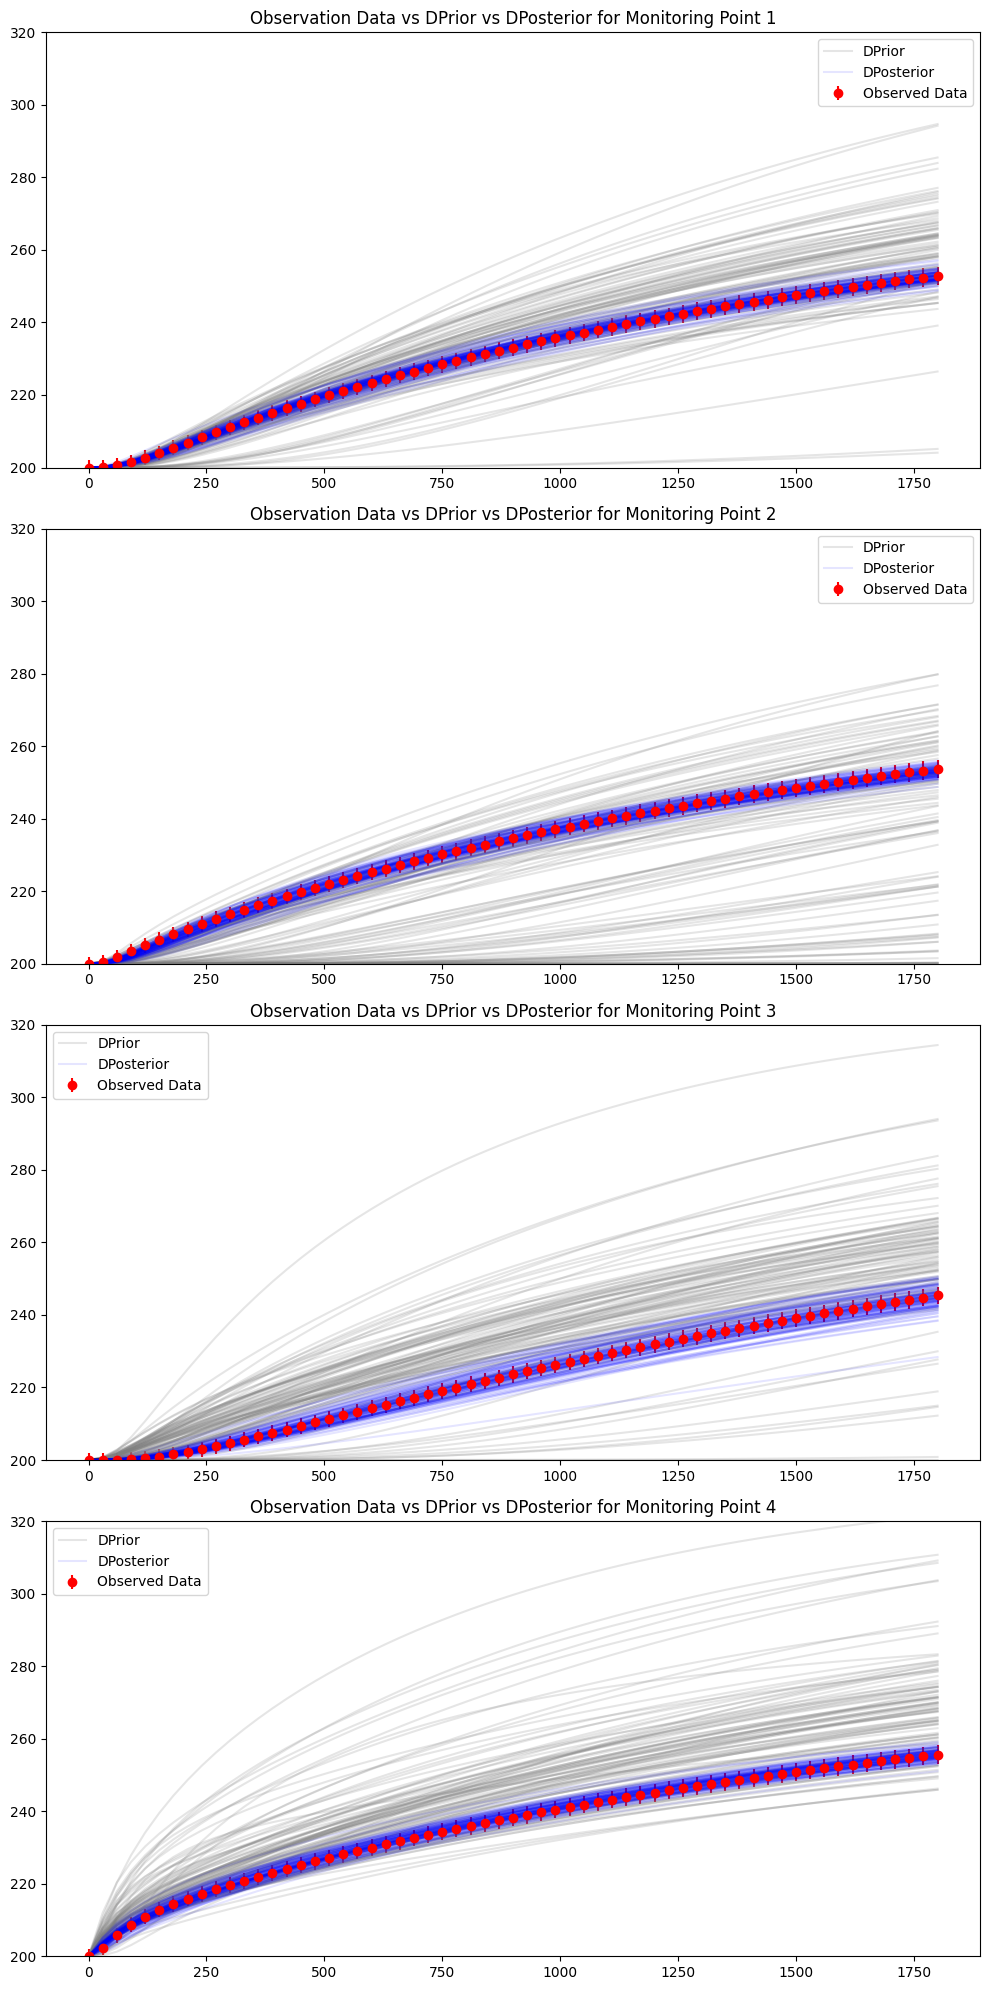

In [82]:
import pandas as pd
DPosterior = pd.read_pickle('/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/simulations_HF/it3/D_3.pkl')
DPrior = pd.read_pickle('/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/simulations_HF/it0/D_0.pkl')
CeDiag =np.where(np.array(0.05*dObs[:])<1e-3, 1e-3, 0.01*dObs[:])
compare_data(DPrior, dObs, DPosterior, CeDiag, time_range)

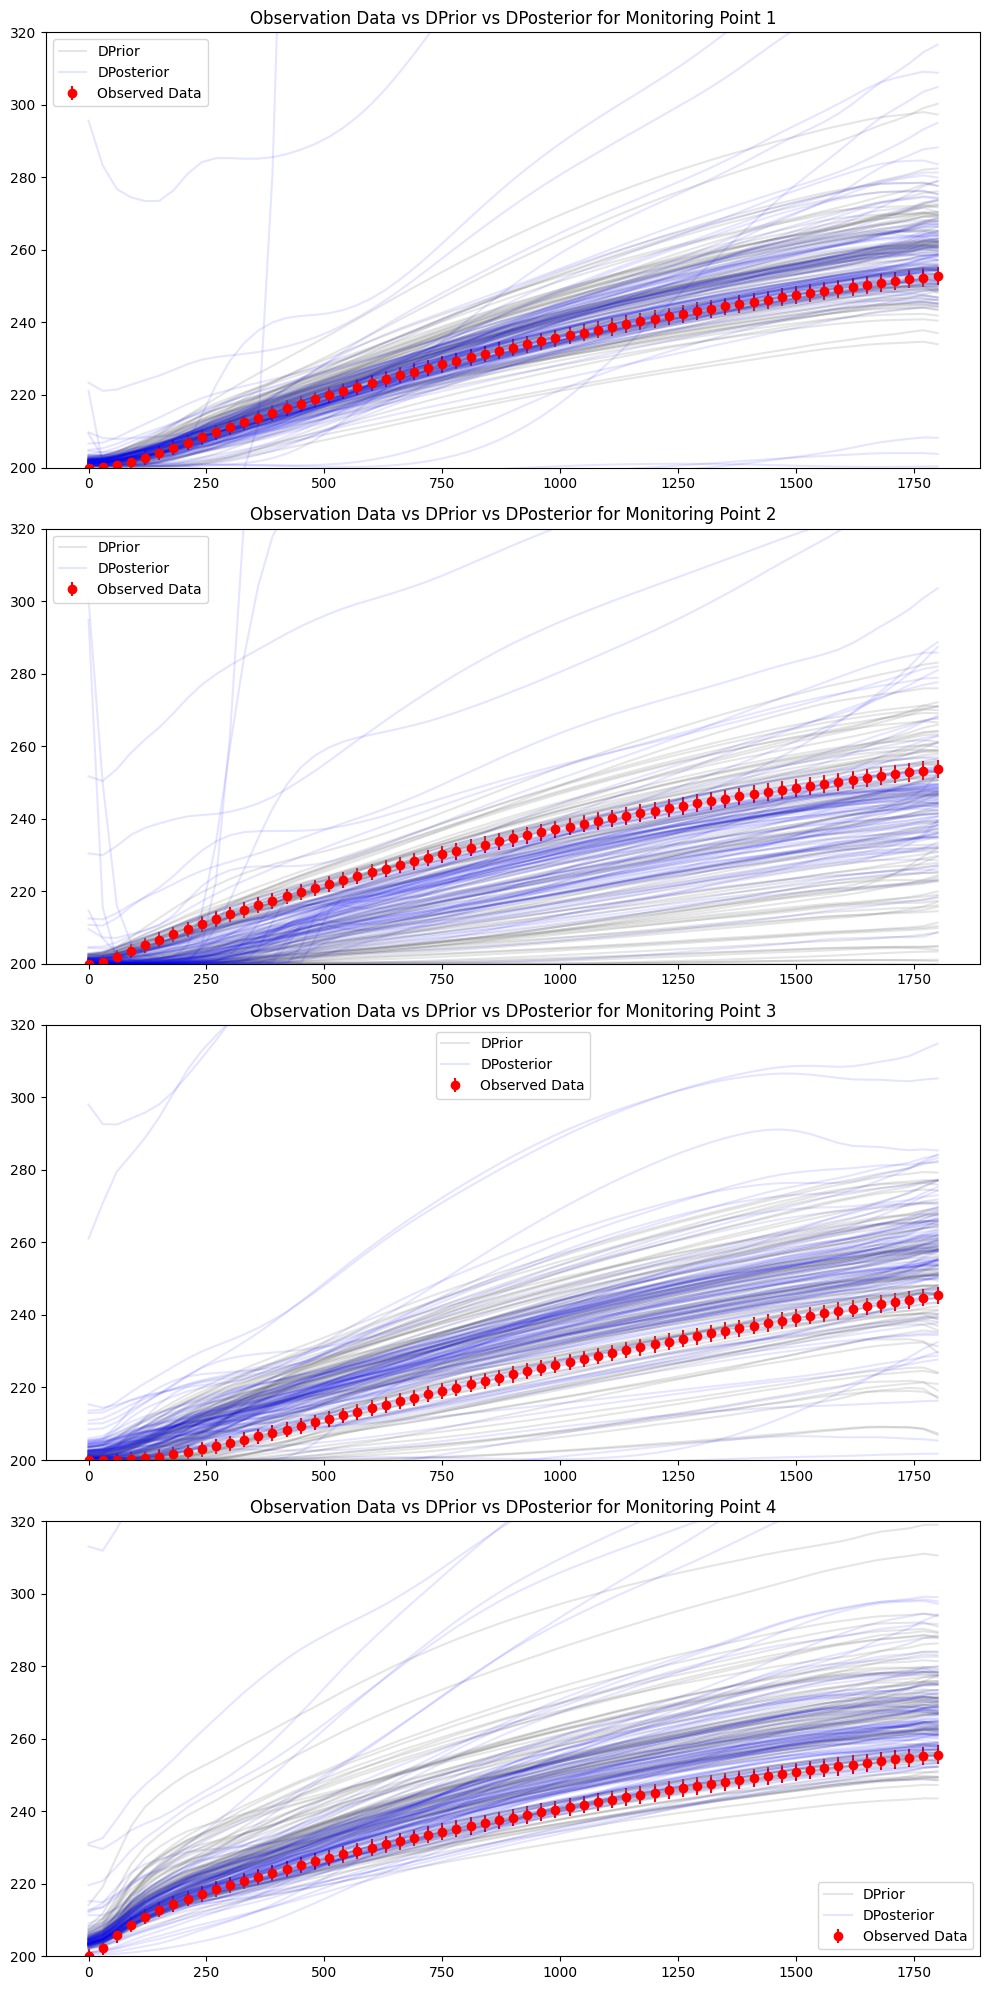

In [75]:
import pandas as pd
DPosterior = pd.read_pickle('/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/simulations_Px/it1/D_1.pkl')
DPrior = pd.read_pickle('/samoa/data/smrserraoseabr/NO-DA/historymatching/ESMDA/simulations_Px/it0/D_0.pkl')
CeDiag =np.where(np.array(0.05*dObs[:])<1e-3, 1e-3, 0.01*dObs[:])
compare_data(DPrior, dObs, DPosterior, CeDiag, time_range)